# Exploración de Datos - Sistema de Documentos Vehiculares

**Objetivo**: Explorar y analizar los datasets descargados para entender su estructura y contenido.

**Datasets a analizar**:
1. Car License Plate Detection
2. Vehicle Odometer Dataset  
3. Document OCR Dataset
4. EV Registration Data

In [3]:
# Importar librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("🔍 EXPLORACIÓN DE DATOS - VEHICLE DOCUMENT SYSTEM")
print("=" * 60)

🔍 EXPLORACIÓN DE DATOS - VEHICLE DOCUMENT SYSTEM


In [2]:
# Configurar directorios
PROJECT_DIR = Path('..')
DATA_DIR = PROJECT_DIR / 'data' / 'raw'

print(f"📁 Directorio de datos: {DATA_DIR}")
print(f"📁 Existe: {DATA_DIR.exists()}")

# Listar datasets disponibles
if DATA_DIR.exists():
    datasets = [d for d in DATA_DIR.iterdir() if d.is_dir()]
    print(f"\n📊 Datasets encontrados: {len(datasets)}")
    for dataset in datasets:
        print(f"  - {dataset.name}")
else:
    print("❌ Directorio de datos no encontrado")

📁 Directorio de datos: ../data/raw
📁 Existe: True

📊 Datasets encontrados: 4
  - ev_registration
  - car_plate_detection
  - odometer_dataset
  - document_ocr


In [4]:
def explore_dataset_folder(folder_path, dataset_name):
    """Explora un folder de dataset y muestra estadísticas"""
    print(f"\n📊 {dataset_name.upper()}:")
    print("-" * 50)
    
    if not folder_path.exists():
        print("  ❌ Folder no encontrado")
        return
    
    # Contar archivos por tipo
    file_stats = {}
    total_size = 0
    image_files = []
    
    for file_path in folder_path.rglob("*"):
        if file_path.is_file():
            ext = file_path.suffix.lower()
            file_stats[ext] = file_stats.get(ext, 0) + 1
            total_size += file_path.stat().st_size
            
            # Recopilar archivos de imagen
            if ext in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
                image_files.append(file_path)
    
    # Mostrar estadísticas
    print(f"  📁 Total archivos: {sum(file_stats.values())}")
    print(f"  💾 Tamaño total: {total_size / (1024*1024):.1f} MB")
    print(f"  🖼️  Imágenes: {len(image_files)}")
    
    # Mostrar tipos de archivo
    print("  📋 Tipos de archivo:")
    for ext, count in sorted(file_stats.items()):
        print(f"    {ext or '[sin ext]'}: {count}")
    
    return image_files[:10]  # Retornar primeras 10 imágenes

# Explorar cada dataset
dataset_images = {}
for dataset_dir in DATA_DIR.iterdir():
    if dataset_dir.is_dir():
        images = explore_dataset_folder(dataset_dir, dataset_dir.name)
        if images:
            dataset_images[dataset_dir.name] = images


📊 EV_REGISTRATION:
--------------------------------------------------
  📁 Total archivos: 1
  💾 Tamaño total: 33.7 MB
  🖼️  Imágenes: 0
  📋 Tipos de archivo:
    .csv: 1

📊 CAR_PLATE_DETECTION:
--------------------------------------------------
  📁 Total archivos: 866
  💾 Tamaño total: 203.0 MB
  🖼️  Imágenes: 433
  📋 Tipos de archivo:
    .png: 433
    .xml: 433

📊 ODOMETER_DATASET:
--------------------------------------------------
  📁 Total archivos: 178
  💾 Tamaño total: 474.1 MB
  🖼️  Imágenes: 178
  📋 Tipos de archivo:
    .jpg: 178

📊 DOCUMENT_OCR:
--------------------------------------------------
  📁 Total archivos: 34
  💾 Tamaño total: 31.1 MB
  🖼️  Imágenes: 32
  📋 Tipos de archivo:
    .csv: 1
    .jpg: 12
    .png: 20
    .xml: 1



📸 VISUALIZACIÓN - CAR_PLATE_DETECTION:


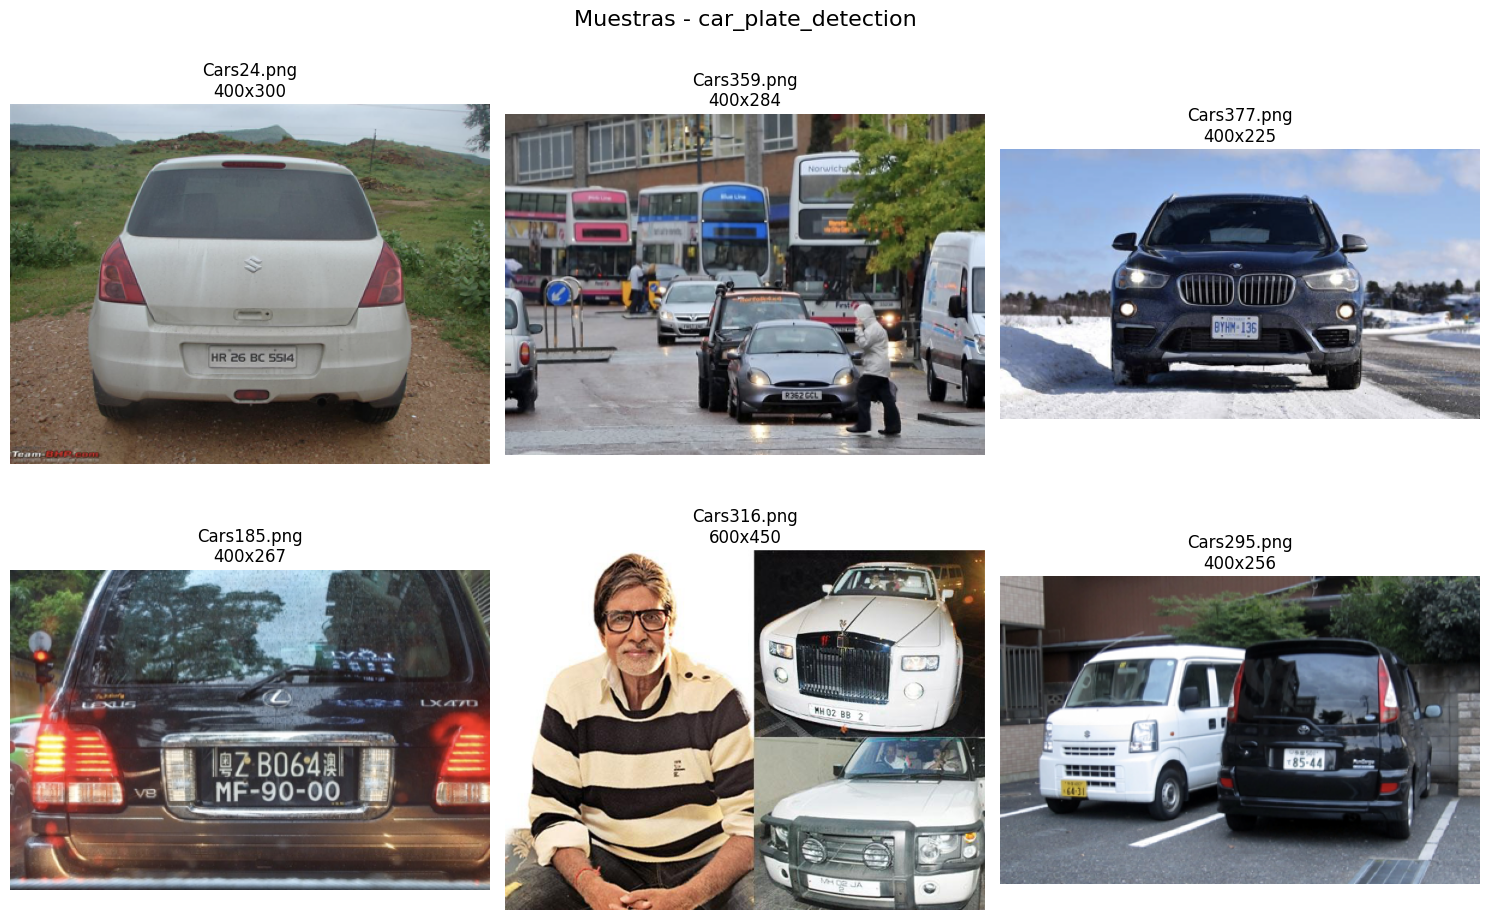


📸 VISUALIZACIÓN - ODOMETER_DATASET:


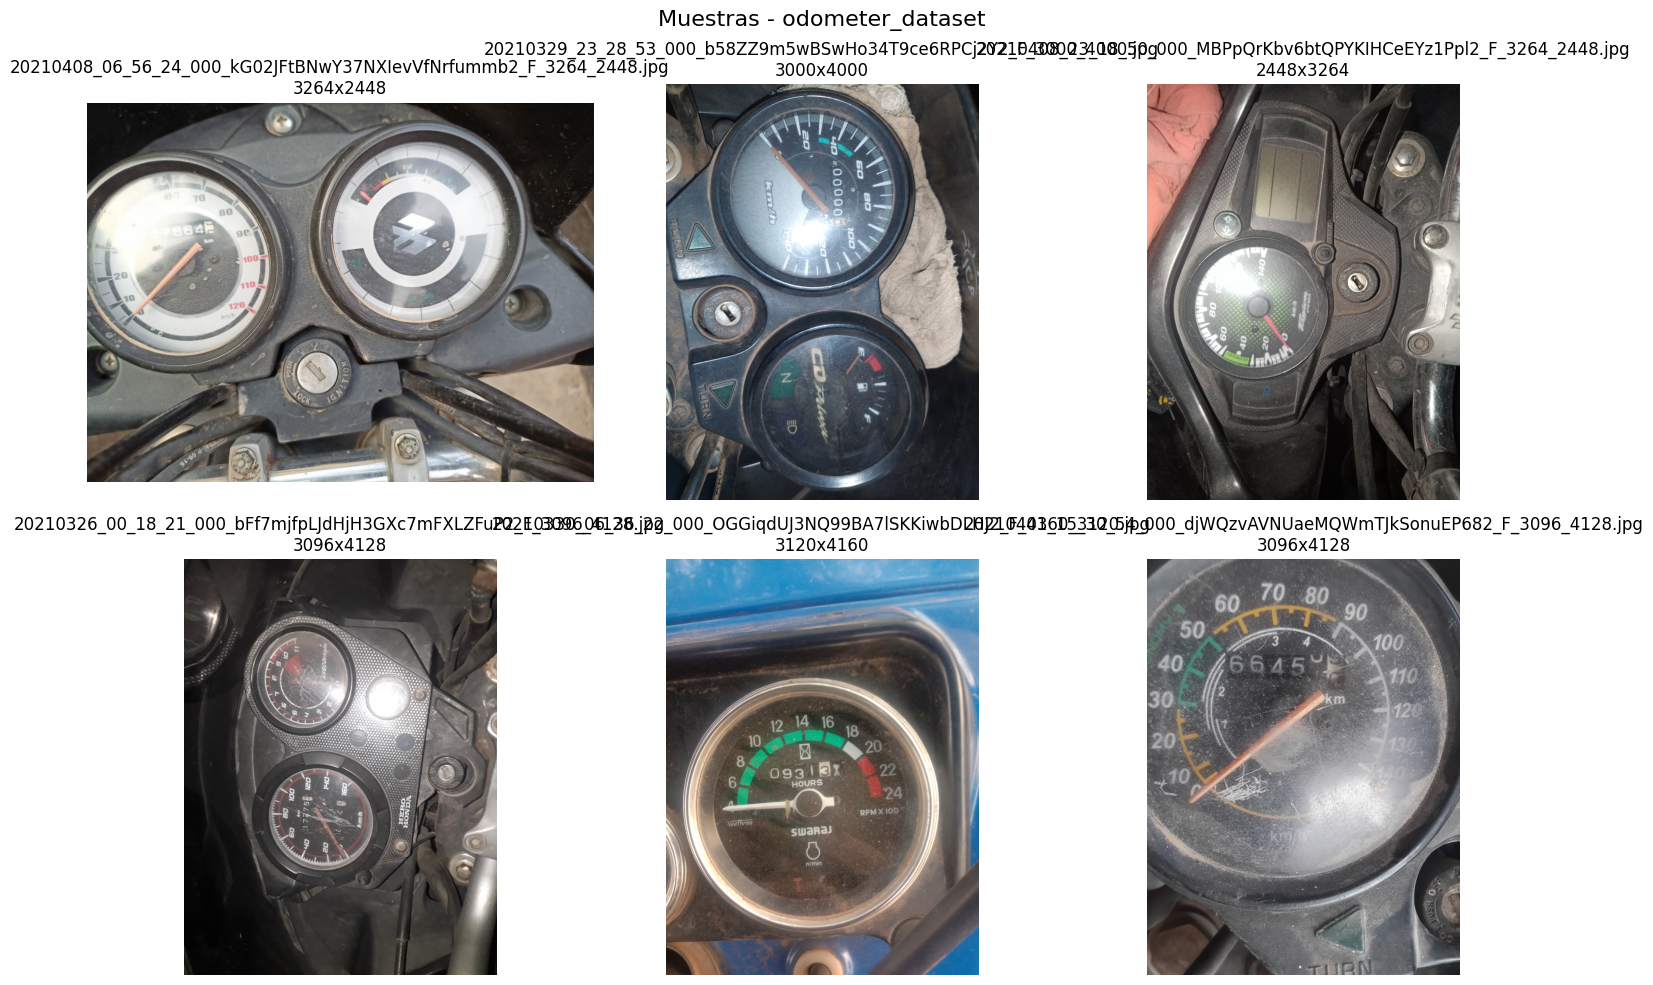


📸 VISUALIZACIÓN - DOCUMENT_OCR:


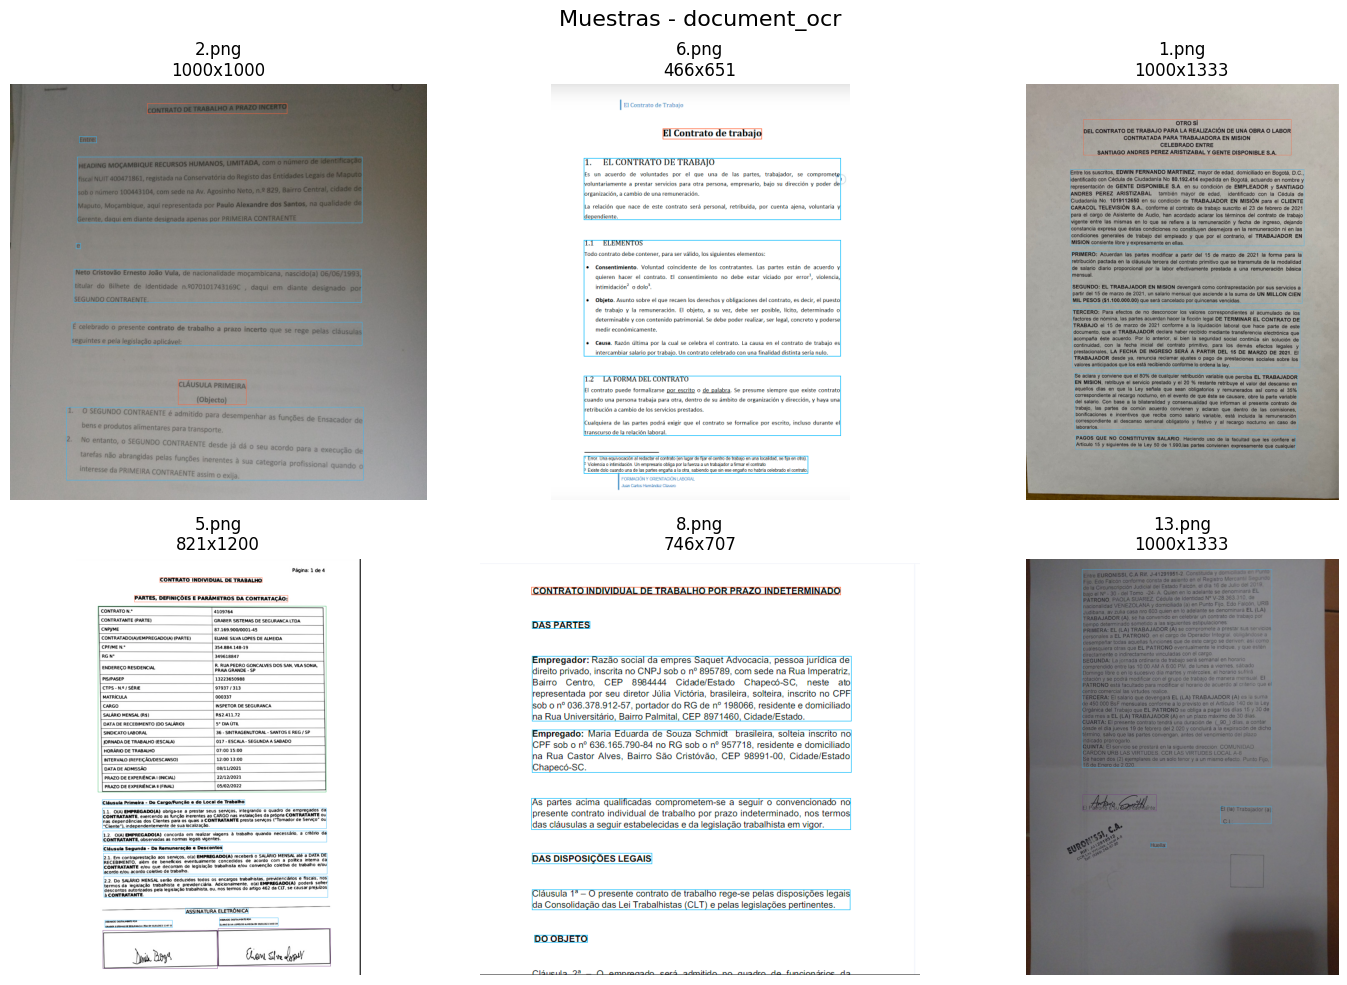

In [5]:
def visualize_sample_images(image_paths, title="Muestras de Imágenes", max_images=6):
    """Visualiza una muestra de imágenes"""
    if not image_paths:
        print(f"❌ No hay imágenes para mostrar en {title}")
        return
    
    n_images = min(len(image_paths), max_images)
    n_cols = 3
    n_rows = (n_images + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle(title, fontsize=16, y=0.98)
    
    # Asegurar que axes sea siempre un array
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i in range(n_rows * n_cols):
        row, col = i // n_cols, i % n_cols
        
        if i < n_images:
            try:
                img_path = image_paths[i]
                img = cv2.imread(str(img_path))
                
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[row, col].imshow(img_rgb)
                    axes[row, col].set_title(f"{img_path.name}\n{img_rgb.shape[1]}x{img_rgb.shape[0]}")
                else:
                    axes[row, col].text(0.5, 0.5, 'Error\ncargando imagen', 
                                       ha='center', va='center', 
                                       transform=axes[row, col].transAxes)
                    axes[row, col].set_title(f"Error - {img_path.name}")
                    
            except Exception as e:
                axes[row, col].text(0.5, 0.5, f'Error:\n{str(e)[:30]}...', 
                                   ha='center', va='center', 
                                   transform=axes[row, col].transAxes)
                axes[row, col].set_title(f"Error - Imagen {i+1}")
        else:
            axes[row, col].axis('off')
            
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualizar muestras de cada dataset
for dataset_name, images in dataset_images.items():
    print(f"\n📸 VISUALIZACIÓN - {dataset_name.upper()}:")
    visualize_sample_images(images, f"Muestras - {dataset_name}", max_images=6)

In [ ]:
# Análisis de dimensiones de imágenes
def analyze_image_dimensions(image_paths, dataset_name):
    """Analiza las dimensiones de las imágenes"""
    if not image_paths:
        return
        
    print(f"\n📏 ANÁLISIS DE DIMENSIONES - {dataset_name.upper()}:")
    print("-" * 40)
    
    dimensions = []
    file_sizes = []
    
    for img_path in image_paths[:20]:  # Analizar primeras 20 imágenes
        try:
            img = cv2.imread(str(img_path))
            if img is not None:
                h, w, c = img.shape
                dimensions.append((w, h))
                file_sizes.append(img_path.stat().st_size / 1024)  # KB
        except Exception as e:
            print(f"  ⚠️ Error procesando {img_path.name}: {e}")
    
    if dimensions:
        widths, heights = zip(*dimensions)
        
        print(f"  📊 Imágenes analizadas: {len(dimensions)}")
        print(f"  📐 Ancho - Min: {min(widths)}, Max: {max(widths)}, Promedio: {np.mean(widths):.1f}")
        print(f"  📐 Alto - Min: {min(heights)}, Max: {max(heights)}, Promedio: {np.mean(heights):.1f}")
        print(f"  💾 Tamaño - Min: {min(file_sizes):.1f} KB, Max: {max(file_sizes):.1f} KB")
        
        # Crear histograma de dimensiones
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        ax1.hist(widths, bins=10, alpha=0.7, color='blue', edgecolor='black')
        ax1.set_title(f'Distribución de Anchos - {dataset_name}')
        ax1.set_xlabel('Ancho (pixels)')
        ax1.set_ylabel('Frecuencia')
        
        ax2.hist(heights, bins=10, alpha=0.7, color='red', edgecolor='black')
        ax2.set_title(f'Distribución de Alturas - {dataset_name}')
        ax2.set_xlabel('Alto (pixels)')
        ax2.set_ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()

# Analizar dimensiones para cada dataset
for dataset_name, images in dataset_images.items():
    analyze_image_dimensions(images, dataset_name)

In [ ]:
# Resumen y próximos pasos
print("\n🎯 RESUMEN DE EXPLORACIÓN:")
print("=" * 50)

total_datasets = len(dataset_images)
total_images = sum(len(images) for images in dataset_images.values())

print(f"✅ Datasets explorados: {total_datasets}")
print(f"✅ Imágenes de muestra analizadas: {total_images}")

print("\n📋 DATASETS DISPONIBLES:")
for dataset_name in dataset_images.keys():
    print(f"  - {dataset_name}")

print("\n🚀 PRÓXIMOS PASOS:")
print("1. 📊 Análisis más profundo de cada dataset")
print("2. 🔧 Preprocesamiento con OpenCV")
print("3. 🏷️  Preparación de labels y anotaciones")
print("4. 🤖 Entrenamiento de modelos")
print("5. 📝 Implementación de OCR")

print("\n🎉 ¡Exploración inicial completada!")